Dylan Hastings

# 1. Twitch API data

The URL `https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}` is an API from twitch to get data from twitch channels.

Get the data from the following channels:

```
["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
```

To make into a dataframe that looks like this:

![](twitch.png)

In [1]:
import requests
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
CHANNEL_NAMES = ["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]

channels_list = []

for CHANNEL_NAME in CHANNEL_NAMES:

    url = f'https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}'
    page = requests.get(url).json()
    if 'error' not in page:
        channels_list.append({'id': page['_id'],
                              'display_name': page['display_name'],
                              'status': page['status'],
                              'followers': page['followers'],
                              'views': page['views']
                             })

In [4]:
dataset = pd.DataFrame(channels_list)

In [5]:
dataset.dropna(axis = 0, how = 'any', inplace = True)

In [6]:
dataset.index = pd.RangeIndex(len(dataset.index))
dataset

,id,display_name,status,followers,views
0,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
1,71852806,OgamingSC2,UnderDogs - Rediffusion - Qualifier.,40895,20694507
2,90401618,cretetion,It's a Divison kind of Day,908,11631
3,79776140,FreeCodeCamp,Greg working on Electron-Vue boilerplate w/ Ak...,10122,163747
4,6726509,Habathcx,Massively Effective,14,764
5,54925078,RobotCaleb,Code wrangling,20,4602
6,82534701,noobs2ninjas,Building a new hackintosh for #programming and...,835,48102


# 2. App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 

- The app ID. This can be found in the web page for the app right after `id`. For instance, Candy Crush's US webpage is:

`https://apps.apple.com/us/app/candy-crush-saga/id553834731`

So here the ID would be `553834731`.

- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

### 2.1 English app reviews

Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!).



In [36]:
reviews = []
app_list = [553834731, 547702041, 284882215, 333903271]
country_list = ['us', 'gb', 'ca', 'au', 'ie', 'nz']
page_list = [1,2,3,4]

for app in app_list:
    for country in country_list:
        for page in page_list:

            url = f'https://itunes.apple.com/{country}/rss/customerreviews/id={app}/{page}/sortby=mostrecent/json'
            data = requests.get(url).json().get('feed')
            for entry in data.get('entry'):
                this_data = {
                    "rating": entry['im:rating']['label'],
                    "version": entry['im:version']['label'],
                    "title": entry['title']['label'],
                    "content": entry['content']['label'],
                    "country_code": country,
                    "appID": app,
                    "page": page
                }
                reviews.append(this_data)

In [37]:
df = pd.DataFrame(reviews)
df

,rating,version,title,content,country_code,appID,page
0,1,1.196.1.1,Game will not load,For weeks now I have not been able to get the ...,us,553834731,1
1,5,1.196.1.1,XoftOfficialKhoded,I love the game cos it’s super amazing and lov...,us,553834731,1
2,1,1.196.1.1,App keeps freezing on iPhone,App keeps freezing on the loading screen on iP...,us,553834731,1
3,5,1.196.1.1,what a moment,an excilant game,us,553834731,1
4,1,1.196.1.1,Life after level 7000,I enjoy this game & have got to the end and wa...,us,553834731,1
...,...,...,...,...,...,...,...
4795,1,8.48,Error 104 app no longer supports free speech!,This app does not promote free speech and has ...,nz,333903271,4
4796,4,8.48,Still some issues on IOS app,Both of these issues never used to be a proble...,nz,333903271,4
4797,1,8.48,Not happy with this app,Can you say c o m m u n i s t s,nz,333903271,4
4798,1,8.48,You are evil,Twitter you are an evil entity destroying demo...,nz,333903271,4


### 2.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.



In [38]:
df['rating'] = df.rating.astype(int)

553834731


,version,mean_rating
0,1.152.0,5.000000
8,1.162.1,5.000000
1,1.153.0,5.000000
27,1.182.0.3,5.000000
16,1.170.0.2,5.000000
30,1.185.0.1,5.000000
24,1.178.0.3,5.000000
9,1.163.0,5.000000
25,1.179.0.3,5.000000
5,1.157.0,5.000000


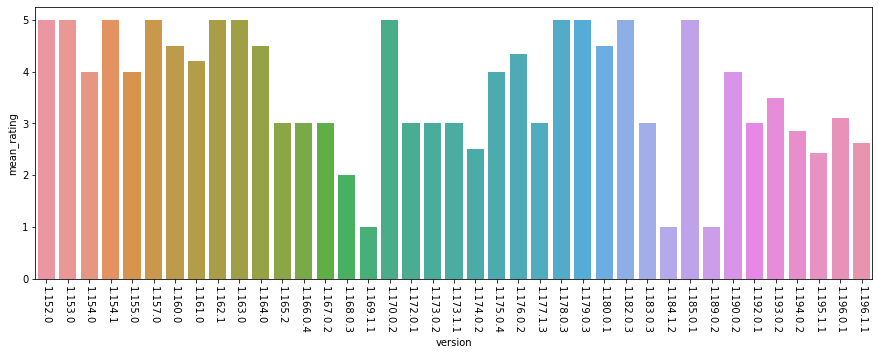

547702041


,version,mean_rating
5,11.30.0,1.636364
8,12.2.0,1.597484
6,11.31.0,1.523810
4,11.29.0,1.428571
7,12.1.0,1.426230
3,11.28.0,1.187500
0,,1.000000
1,11.26.1,1.000000
2,11.27.0,1.000000


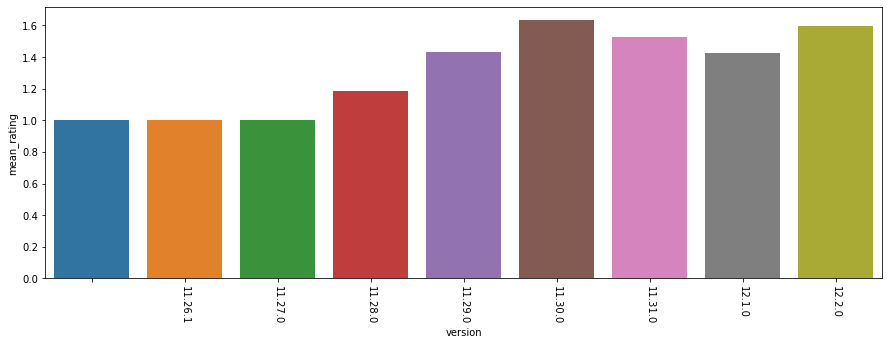

284882215


,version,mean_rating
5,302.0,2.000000
10,305.0,1.571429
9,304.1,1.500000
2,299.0,1.400000
12,307.0,1.361111
11,306.0,1.282051
3,300.0,1.250000
7,303.0,1.200000
0,252.3,1.000000
1,297.0,1.000000


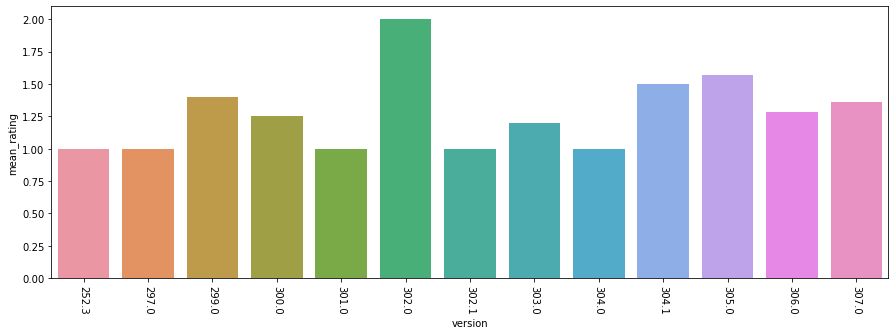

333903271


,version,mean_rating
2,8.42.5,5.000000
6,8.45,5.000000
8,8.47.1,5.000000
13,8.52.1,3.400000
14,8.53,3.000000
16,8.54.5,2.651163
15,8.54,2.649123
17,8.55,2.536585
3,8.43,2.333333
1,8.42,2.200000


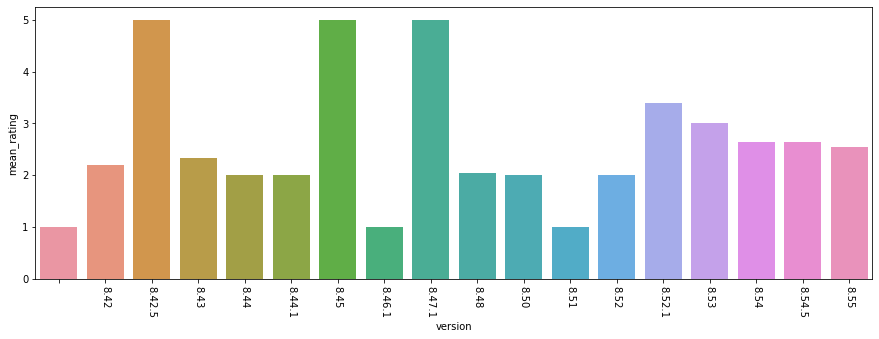

In [39]:
for app in app_list:
    df_temp = df[df.appID == app]
    df_temp_ratings = df_temp.groupby('version') \
                           .agg(mean_rating=('rating', 'mean')) \
                           .reset_index()
    df_temp_ratings_sorted = df_temp_ratings.sort_values(by='mean_rating', ascending=False)
    print(app)
    display(df_temp_ratings_sorted)
    fig, ax = plt.subplots(figsize = (15,5))
    sns.barplot(df_temp_ratings.version, df_temp_ratings.mean_rating)
    plt.xticks(rotation=270)
    plt.show()

### 2.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?

Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [40]:
for app in app_list:
    print(app)
    print("1-star rating")
    df_temp = df[(df.appID == app) &
            (df.rating == 1)]
    df_temp_words = df_temp.title.str.get_dummies(sep = " ")
    display(df_temp_words.sum().sort_values(ascending=False).idxmax())
    print("5-star rating")
    df_temp = df[(df.appID == app) &
            (df.rating == 5)]
    df_temp_words = df_temp.title.str.get_dummies(sep = " ")
    display(df_temp_words.sum().sort_values(ascending=False).idxmax())
    print("**********")

553834731
1-star rating


'game'

5-star rating


'Candy'

**********
547702041
1-star rating


'for'

5-star rating


'Prices!'

**********
284882215
1-star rating


'Facebook'

5-star rating


'مؤهل'

**********
333903271
1-star rating


'Twitter'

5-star rating


'Twitter'

**********


# 3 (STRETCH) IMDB scraping

IMDB has structured web pages. We can exploit this to scrape movie data.

Usinf the following URL:

`https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt`

With the following headers in your `GET` request: `{"Accept-Language": "en-US,en;q=0.5"}`

You can generate a dataframe like this one by cycling over the page numbers in the URL requested:

![](IMDB.png)

Note that the following  page attribues will be of interest:

- `div` with a class of `lister-item mode-advanced`

- Various `span` objects within that `div` like `lister-item-year` and `runtime` and `metascore`